In [112]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import skimage.io
import cv2
import skimage.feature

In [15]:
path = os.getcwd()

In [12]:
# 1 
scale = 12 
Lxx = 5.12 
Lyy = 7.16

lap = scale*(Lxx + Lyy)
lap

147.36

In [13]:
# 2
19.9*2, 13.7*3, 9.8*4, 7*5

(39.8, 41.099999999999994, 39.2, 35)

In [22]:
data = np.loadtxt(path + '/EXAM_DATA_2021/distances.txt')
labels = np.loadtxt(path + '/EXAM_DATA_2021/labels.txt')

array([[ 4.4,  5.9,  4.9,  0.4,  3.3,  4.4,  2.5,  2.6,  4.7,  5.8,  1.1,
         3.9,  0.3,  5.3,  2.4,  5.4,  4.2],
       [ 1.2,  0.4,  0.4,  2.5,  2.6,  2.9,  2.2,  1.8,  1.6,  2.3,  0.9,
         0.6,  1.6,  2.3,  0.8,  2.5,  0. ],
       [ 4.9,  5. ,  8.9,  5. ,  9. ,  1.4,  5.5,  7.6,  8.5,  7.1,  0.7,
         9.5,  5.4,  8.8, 10.1,  4.3,  0.6],
       [ 4.9,  6.7,  2. ,  5.5,  6.7,  7.6,  6.7,  6. ,  7.8,  4.1,  8.9,
         6.9,  4.7,  3.2,  2.1,  2.8,  0.5]])

In [41]:
# Q 4
min_dist = np.min(data, axis=0)
idx = data[1,:] == min_dist
(labels[idx] == 1).sum()/(labels[idx] != 0).sum(), (7/(7+6))


(0.5384615384615384, 0.5384615384615384)

In [48]:
# Q  5

l1 = np.array([[0, 0, 0], [0, 0.04, 0], [0, 0, 0]])
l2 = np.array([[0.02, 0.01, 0.01], [0.15, 0.9, 0.01], [0.15, 0.02, 0.02]])
l3 = 1 - (l2+l1)
l3[np.where(l3 == 0.99)] = 0.98
l3

l1.mean(), l2.mean(), l3.mean()

(0.0044444444444444444, 0.14333333333333334, 0.8488888888888889)

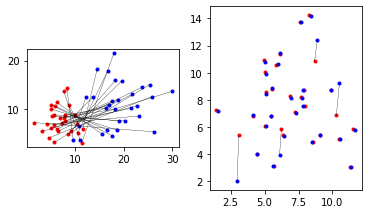

In [70]:
# Q 6 

p = np.loadtxt(path + '/EXAM_DATA_2021/points_p.txt')
q = np.loadtxt(path + '/EXAM_DATA_2021/points_q.txt')
theta = np.deg2rad(140)
t = np.array([[36, 13]]).T
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
s = 1.7


p_ = R.T@((q-t)/s)

distance = np.sqrt(np.sum((p-p_)**2, axis=0))
outliers = (distance>=2).sum()
outliers

fig,ax = plt.subplots(1,2)
ax[0].plot(p[0], p[1], 'r.', q[0], q [1], 'b.')
ax[0].plot(np.stack((p[0], q[0])), np.stack((p[1], q[1])), 'k', linewidth = 0.3)
ax[0].set_aspect('equal')
ax[1].plot(p[0], p[1], 'r.', p_[0], p_[1], 'b.')
ax[1].plot(np.stack((p[0], p_[0])), np.stack((p[1],p_[1])),  'k', linewidth = 0.3)
ax[1].set_aspect('equal')


In [75]:
dx = (-209+147)
dy = (215-158)
nabla = np.sqrt(dx**2 + dy**2)
nabla

84.21995013059554

In [78]:
# Q 10 
E_current = np.abs(20-52)**2 + 1*125
E_new = np.abs(30-52)**2 + 3*125 
change = E_new - E_current
change

-290

In [85]:
400-11+1, 560-11+1, (400-11+1) * (560-11+1)
201-8+1, 201-8+1, (201-8+1) * (201-8+1), 8*8, 7*7

(194, 194, 37636, 64, 49)

In [121]:
def gauss(sigma, o=0):
    """
    Parameters
    ----------
    sigma : Integer
        Variance of the gaussian
    x : List
        List to which you'd like to apply the gauusian
    o : TYPE, int
        The default is 0.

    Returns
    -------
    g : list
        List of values with the gaussian applied

    """
    s_f = np.ceil(5*np.sqrt(sigma))
    x = np.arange(-s_f, s_f + 1)
    # x = np.linspace(start =-s_f, stop= s_f, num=18)
    print(x)
    # print(x1)
    s = np.sqrt(sigma)
    e = np.exp((-x**2)/(2*s**2))
    if o == 0:
        g = 1/(np.sqrt(2*np.pi*s**2))*e
    elif o == 1:
        g = -x/(s**3*np.sqrt(2*np.pi))*e
    elif o == 2:
        g = (e/(s**3*np.sqrt(2*np.pi)))*(-1+((x**2)/(s**2)))
    elif o == 3:
        g = (-2*(-x/(s**3*np.sqrt(2*np.pi))*e))/s**2 - x/s**2*(e/(s**3*np.sqrt(2*np.pi)))*(-1+((x**2)/(s**2)))
    else:
        print('Please choose between 0, 1, 2 deriatives')
    return np.expand_dims(g,axis=1)

In [88]:
import numpy as np
import scipy.ndimage

def get_gauss_feat_im(im, sigma=1, normalize=True):
    """Gauss derivative feaures for every image pixel.
    Arguments:
        image: a 2D image, shape (r,c).
        sigma: standard deviation for Gaussian derivatives.
        normalize: flag indicating normalization of features.
    Returns:
        imfeat: 3D array of size (r,c,15) with a 15-dimentional feature
             vector for every pixel in the image.
    Author: vand@dtu.dk, 2020
    """
      
    r,c = im.shape
    imfeat = np.zeros((r,c,15))
    imfeat[:,:,0] = scipy.ndimage.gaussian_filter(im,sigma,order=0)
    imfeat[:,:,1] = scipy.ndimage.gaussian_filter(im,sigma,order=[0,1])
    imfeat[:,:,2] = scipy.ndimage.gaussian_filter(im,sigma,order=[1,0])
    imfeat[:,:,3] = scipy.ndimage.gaussian_filter(im,sigma,order=[0,2])
    imfeat[:,:,4] = scipy.ndimage.gaussian_filter(im,sigma,order=[1,1])
    imfeat[:,:,5] = scipy.ndimage.gaussian_filter(im,sigma,order=[2,0])
    imfeat[:,:,6] = scipy.ndimage.gaussian_filter(im,sigma,order=[0,3])
    imfeat[:,:,7] = scipy.ndimage.gaussian_filter(im,sigma,order=[1,2])
    imfeat[:,:,8] = scipy.ndimage.gaussian_filter(im,sigma,order=[2,1])
    imfeat[:,:,9] = scipy.ndimage.gaussian_filter(im,sigma,order=[3,0])
    imfeat[:,:,10] = scipy.ndimage.gaussian_filter(im,sigma,order=[0,4])
    imfeat[:,:,11] = scipy.ndimage.gaussian_filter(im,sigma,order=[1,3])
    imfeat[:,:,12] = scipy.ndimage.gaussian_filter(im,sigma,order=[2,2])
    imfeat[:,:,13] = scipy.ndimage.gaussian_filter(im,sigma,order=[3,1])
    imfeat[:,:,14] = scipy.ndimage.gaussian_filter(im,sigma,order=[4,0])

    if normalize:
        imfeat -= np.mean(imfeat, axis=(0,1))
        imfeat /= np.std(imfeat, axis=(0,1))
    
    return imfeat

In [93]:
im = np.array([[200, 210, 235, 167, 187],
               [198, 194, 187, 176, 185],
               [156, 188, 165, 156, 156],
               [145, 165, 158, 165, 157],
               [152, 127, 125, 176, 100]])
im = im/255

In [100]:
feat = get_gauss_feat_im(im, sigma = 4, normalize=True)
feat[:,:,11]

array([[ 1.18544006,  0.61076604,  0.39050294,  0.61558892,  1.1764132 ],
       [ 0.63689081, -0.86363791, -1.43877109, -0.85099908,  0.61324454],
       [ 0.42715381, -1.42738456, -2.13821487, -1.41176753,  0.39791022],
       [ 0.63608365, -0.86574947, -1.44138195, -0.85311635,  0.61243373],
       [ 1.18638184,  0.61323239,  0.39356014,  0.61806443,  1.17735609]])

array([[0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922],
       [0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922],
       [0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922],
       ...,
       [0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922],
       [0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922],
       [0.49803922, 0.49803922, 0.49803922, ..., 0.49803922, 0.49803922,
        0.49803922]])

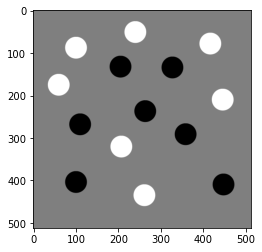

In [122]:
im = skimage.io.imread('../Exam_2021/test_blob_uniform.png')/255

plt.imshow(im, cmap='gray')
im

In [123]:
thres = 0.05

def laplacian(I, sigma, smooth=None):
    if smooth:  # Apply smoothness 
        g = gauss(sigma)
        Ix = cv2.filter2D(I,-1,g)
        Iy = cv2.filter2D(I,-1,g.T) 
        # Apply gausians so we can use the semi-group property
        Im = cv2.filter2D(cv2.filter2D(I,-1,g),-1,g.T) 
    else:
        Ix = Iy = I
        Im = I
        
    g2 = gauss(sigma, o = 2)  # 2dn derivative
    I_xx = cv2.filter2D(Ix, -1, g2.T)  # On the X axis we apply the transpose the kernel. As we want to detect the perpendicular edges
    I_yy = cv2.filter2D(Iy, -1, g2)
    lap = sigma*(I_xx + I_yy)
    return lap, Im


sigma = 3
I_lap,_ = laplacian(im, sigma, smooth = True)
I_lap

[-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
  9.]
[-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
  9.]


array([[-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07],
       [-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07],
       [-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07],
       ...,
       [-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07],
       [-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07],
       [-8.89518228e-07, -8.89518228e-07, -8.89518228e-07, ...,
        -8.89518228e-07, -8.89518228e-07, -8.89518228e-07]])

In [124]:
# Get the coordinates from the white circles
c_pos = skimage.feature.peak_local_max(I_lap, min_distance=2, threshold_abs=thres)
# Get the coordinates of the black circles
c_neg = skimage.feature.peak_local_max(-I_lap, min_distance=2, threshold_abs=thres)

# Concat both coordinate arrays in a single array.
coord = np.r_[c_pos, c_neg]

coord.shape

(813, 2)